In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('bane.png',0)

plt.imshow(img)
plt.title('my picture')
plt.show()

<Figure size 640x480 with 1 Axes>

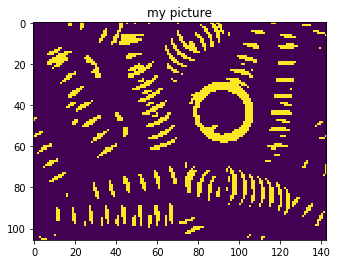

In [2]:
th = 180                                              # 閾値
i_max = 255                                                     # 最大輝度値
ret, img_binary = cv2.threshold(img, th, i_max, cv2.THRESH_BINARY)

plt.imshow(img_binary)
plt.title('my picture')
plt.show()

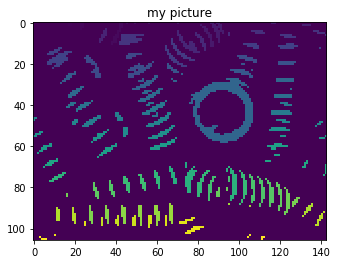

In [3]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_binary)

plt.imshow(labels)
plt.title('my picture')
plt.show()

In [4]:
def remove_objects(img, lower_size=None, upper_size=None):
    # find all objects
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img)

    sizes = stats[1:, -1]
    _img = np.zeros((labels.shape))

    # process all objects, label=0 is background, objects are started from 1
    for i in range(1, nlabels):

        # remove small objects
        if (lower_size is not None) and (upper_size is not None):
            if lower_size < sizes[i - 1] and sizes[i - 1] < upper_size:
                _img[labels == i] = 255

        elif (lower_size is not None) and (upper_size is None):
            if lower_size < sizes[i - 1]:
                _img[labels == i] = 255

        elif (lower_size is None) and (upper_size is not None):
            if sizes[i - 1] < upper_size:
                _img[labels == i] = 255

    return _img

In [5]:
def take_objects(label_img):
    # find all objects
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(label_img))

    sizes = stats[1:, -1]
    _img = np.zeros((labels.shape))
    _img_list = []

    # process all objects, label=0 is background, objects are started from 1
    for i in range(1, nlabels):
        _img = np.zeros((labels.shape))
        _img[labels == i] = 255
        _img_list.append(_img)
     
    return _img_list    

In [512]:
def high_light_objects(img, number_list, value):
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(img))
    sizes = stats[1:, -1]
    #_img = np.zeros((labels.shape))
    _img = img
    
    for i in range(1, nlabels):
        if number_list.count(i-1):
            _img[labels == i] = value
            continue
            
        #_img[labels == i] = 255
    
    return _img
    

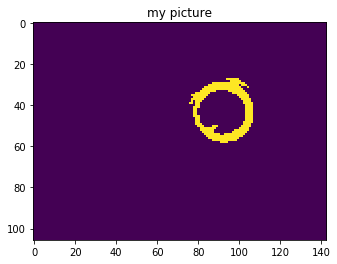

In [513]:
end_face_img = remove_objects(img_binary, 100, 1000)

plt.imshow(end_face_img)
plt.title('my picture')
plt.show()

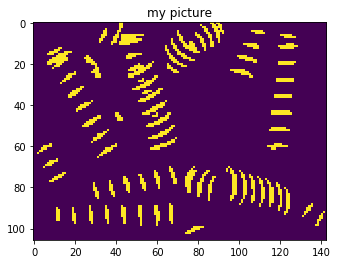

In [538]:
side_face_img = remove_objects(img_binary, 10, 100)

plt.imshow(side_face_img)
plt.title('my picture')
plt.show()

69


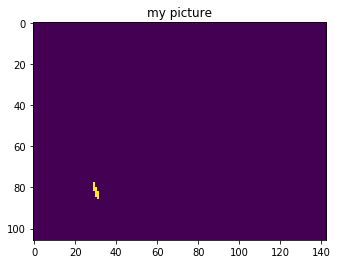

In [515]:
label_imgs = take_objects(side_face_img)
print(len(label_imgs))

number = 55

plt.imshow(label_imgs[number])
plt.title('my picture')
plt.show()

In [516]:
import math

m = cv2.moments(label_imgs[number])
h_laxis = math.atan2(2*m['mu11'], m['mu20']-m['mu02'])/2
print(h_laxis)

1.2605090878715697


In [517]:
x = m['m10']/m['m00']
y = m['m01']/m['m00']
print(x,y)
print(img.shape)
center_x = img.shape[1]/2
center_y = img.shape[0]/2
print(center_x, center_y)

move_x = center_x - x
move_y = center_y - y

print(move_x, move_y)

30.0 81.6923076923077
(106, 143)
71.5 53.0
41.5 -28.692307692307693


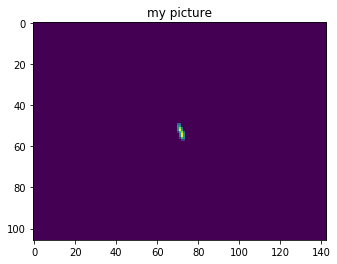

In [518]:

rows,cols = label_imgs[number].shape
M = np.float32([[1,0,move_x],[0,1,move_y]])
dst = cv2.warpAffine(label_imgs[number],M,(cols,rows))

plt.imshow(dst)
plt.title('my picture')
plt.show()

72.22185077292598


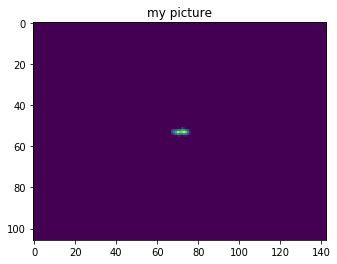

In [519]:
angle = h_laxis/np.pi * 180
print(angle)
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv2.warpAffine(dst,M,(cols,rows))

plt.imshow(dst)
plt.title('my picture')
plt.show()

In [520]:
m2 = cv2.moments(dst)
h_cm = m2['mu21']/(m2['mu20']*math.sqrt(m2['mu02']))
print(h_cm)

0.0003927850661969388


In [521]:
def get_grouping_params(img):
    m = cv2.moments(img)
    h_area = m['m00']
    h_laxis = h_laxis = math.atan2(2*m['mu11'], m['mu20']-m['mu02'])/2
    
    area_x = m['m10']/m['m00']
    area_y = m['m01']/m['m00']
    
    img_center_x = img.shape[1]/2
    img_center_y = img.shape[0]/2

    move_x = img_center_x - area_x
    move_y = img_center_y - area_y

    rows,cols = img.shape
    M = np.float32([[1,0,move_x],[0,1,move_y]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    angle = h_laxis/np.pi * 180
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(dst,M,(cols,rows))
    
    m2 = cv2.moments(dst)
    h_cm = m2['mu21']/(m2['mu20']*math.sqrt(m2['mu02']))

    return h_area, h_laxis, h_cm

def get_center(img):
    m = cv2.moments(img)
    h_area = m['m00']
    h_laxis = h_laxis = math.atan2(2*m['mu11'], m['mu20']-m['mu02'])/2
    
    area_x = m['m10']/m['m00']
    area_y = m['m01']/m['m00']

    return [area_x, area_y]

[2, 15, 43, 52, 54]


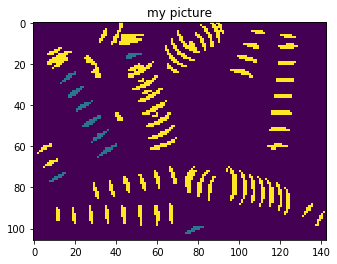

In [522]:
group_img = high_light_objects(side_face_img, groups[30], 100)
print(groups[2])
plt.imshow(group_img)
plt.title('my picture')
plt.show()

In [523]:
data

[[123.52380952380952, 11.142857142857142, 12],
 [47.733333333333334, 15.733333333333333, 14],
 [122.76470588235294, 19.470588235294116, 18],
 [16.785714285714285, 26.285714285714285, 21],
 [20.105263157894736, 33.578947368421055, 24],
 [24.0625, 40.5, 27],
 [28.095238095238095, 47.61904761904762, 30],
 [31.764705882352942, 55.0, 35],
 [5.2727272727272725, 60.81818181818182, 37],
 [35.72222222222222, 61.833333333333336, 38],
 [118.25, 59.875, 39],
 [8.25, 67.91666666666667, 40],
 [11.5, 75.0, 44],
 [77.8125, 100.3125, 68]]

In [524]:
#line p1 ~ p2 
#point p3
def calc_distance_to_line(p1, p2, p3):
    x1 = p1[0]
    y1 = p1[1]

    x2 = p2[0]
    y2 = p2[1]

    x3 = p3[0]
    y3 = p3[1]
    u = np.array([x2 - x1, y2 - y1])
    v = np.array([x3 - x1, y3 - y1])
    L = abs(np.cross(u, v) / np.linalg.norm(u))
    
    return L

In [525]:
def delete_not_line_point(points):
    k = 100
    e = 5
    
    qualified_p = []
    max_count = 0
    #print(points)
    if len(points) < 2:
        return points
    for i in range(k):
        labels = np.random.choice(len(points), 2, False)
        p = []
        c = 0
        for j in range(len(points)):
            d = calc_distance_to_line(points[labels[0]], points[labels[1]], points[j])
            if d < e:
                p.append(points[j])
                c += 1
                
        if c > max_count:
            max_count = c
            qualified_p = p
      
    return qualified_p

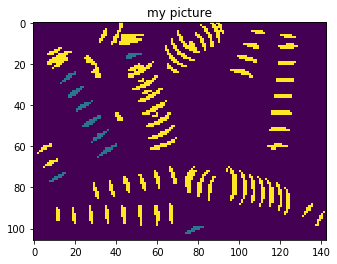

In [526]:
delete_img = high_light_objects(side_face_img, [row[2] for row in points2], 100)
plt.imshow(delete_img)
plt.title('my picture')
plt.show()


In [ ]:
# delete_img = high_light_objects(side_face_img, [row[2] for row in data], 100)
plt.imshow(delete_img)
plt.title('my picture')
plt.show()

In [527]:
from copy import deepcopy
from operator import itemgetter

def most_val(list, error = 3):
    counts = []
    for i in list:
        count = 0
        for j in list:
            if i < j + error and i > j - error:
                count += 1
        counts.append([i,count])
    #print("counts:",counts)
    counts.sort(key=itemgetter(1), reverse=True)
    #print("counts:",counts)
    return counts[0][0]
    
def delete_bad_interval_on_line(points):
    error = 3

    np_p1 = np.array(copy.copy(points[0]))
    np_p2 = np.array(copy.copy(points[1]))
    p_inf = np_p1 + 100000*(np_p2 - np_p1)
    
    points_add_dis = copy.deepcopy(points)
    

    
    for i in range(len(points)):
        d = math.sqrt(pow((points[i][0] - p_inf[0]),2) + pow((points[i][1] - p_inf[1]),2))
        points_add_dis[i].append(i)#add index
        points_add_dis[i].append(d)#add distance
        
    points_add_dis = np.array(points_add_dis)
    #print(points_add_dis)
    #points_add_dis.sort(axis = (len(points_add_dis[0])-2))
    #np.sort(points_add_dis, axis = 0)
    np.sort(points_add_dis, axis=-1)
    
    ptp_dis_list = []
    
    for i in range(len(points_add_dis)-1):
        ptp_dis_list.append(math.sqrt(pow(points_add_dis[i][0] - points_add_dis[i+1][0],2) + pow(points_add_dis[i][1] - points_add_dis[i+1][1],2)))

    #print("ptp_dis_list:", ptp_dis_list)
    error_index = []
    
    mval = most_val(ptp_dis_list)
    for i in range(len(ptp_dis_list)):
        if not( ptp_dis_list[i] > mval - error and ptp_dis_list[i] < mval + error):
            error_index.append(i)
    
    #point数 len(points_add_dis):7+
    #error_index 3 
    #0-1-2|3-4-5-6
    #count1:3, count2:4(7-3)
    #error index 3,5
    #0-1-2|3-4|5-6
    #count1:3, 2(5-3), 2(7-5)
    #error index none
    #0-1-2-3-4-5-6
    #count1:7
     
    divite_points_size = len(error_index) + 1
    divite_points = [0] * divite_points_size
    for i in range(divite_points_size):
        divite_points[i] = []
    #print(divite_points)
    
    now_index = 0
    #print("error_index:", error_index)
    for i in range(len(error_index)):
        for j in range(int(now_index), int(error_index[i]+1)):
            divite_points[i].append(j)
        now_index = error_index[i]+1
    
    for i in range(int(now_index), int(len(points_add_dis))-1):
        divite_points[divite_points_size-1].append(i)
   
    #print("divite_points:", divite_points)
    
    max_size = 0
    max_index = 0
    for i in range(len(divite_points)):
        size = len(divite_points[i])
        if size > max_size:
            max_size = size
            max_index = i
    
    result_index = divite_points[max_index]
    #print(result_index)
    
    #print(len(points_add_dis))
    result_points_index = []
    for i in result_index:
        result_points_index.append(points_add_dis[i][len(points_add_dis[0])-2])
    
    result_points = []
    #print("result_points_index:", result_points_index)
    for i in range(len(result_points_index)):
        result_points.append(points[int(result_points_index[i])])
    
    return result_points


In [541]:
groups = []

h_area_diff = 2000
h_laxis_diff = 0.4
h_cm_diff = 0.004

for i in range(len(label_imgs)):
    params = get_grouping_params(label_imgs[i])
    group = []
    for j in range(len(label_imgs)):
        p = get_grouping_params(label_imgs[j])
        if params[0] < p[0] + h_area_diff and params[0] > p[0] - h_area_diff:
            if params[1] < p[1] + h_laxis_diff and params[1] > p[1] - h_laxis_diff:
                if params[2] < p[2] + h_cm_diff and params[2] > p[2] - h_cm_diff:
                    group.append(j)
    groups.append(group)
print(len(groups))

69


69
21


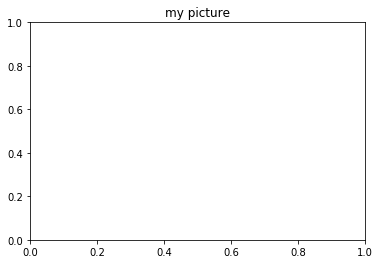

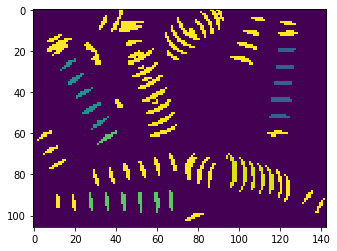

In [545]:


#detection_img = high_light_objects(side_face_img, [row[2] for row in points2], 100)
detection_img = copy.copy(side_face_img)
label_buf = []
value = 30
count = 0
print(len(groups))
for i in range(len(groups)):
    data = []
    for j in groups[i]:
        c = get_center(label_imgs[j])
        data.append([c[0], c[1], j])
    
    if len(data) < 3:
        pass
    else:
        points = delete_not_line_point(data)
        #print(points)
        points2 = delete_bad_interval_on_line(points)
        #print(points2)
        b = [x[2] for x in points2]
        #print(b)
        valid_group = 1
        for i in b:
            if label_buf.count(i):
                valid_group = 0
        if valid_group:
            if len(b) > 3:
                for i in b:
                    label_buf.append(i)
                    value += 10
                    detection_img = high_light_objects(side_face_img, [row[2] for row in points2], value)
                    count += 1
        
            
print(count)           
plt.title('my picture')
plt.show()       
plt.imshow(detection_img)      
            
        
        
        
        